# $$\text{Practical 4}$$

## Name : Yashkumar Jain
## Roll no : 71
## Batch : E4
## Subject : DVA Lab

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


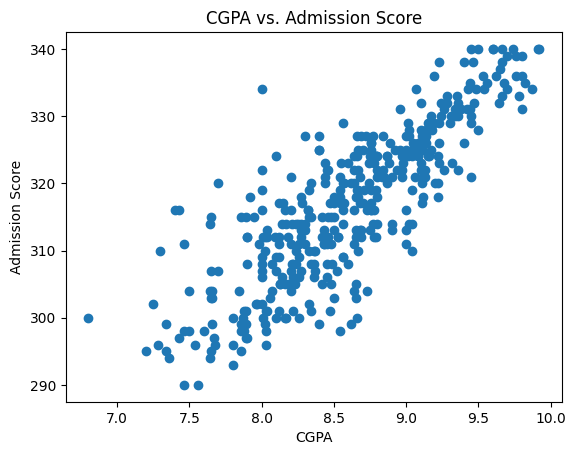

Slope: -0.6468096960251732, Intercept: 0.12827475506933772


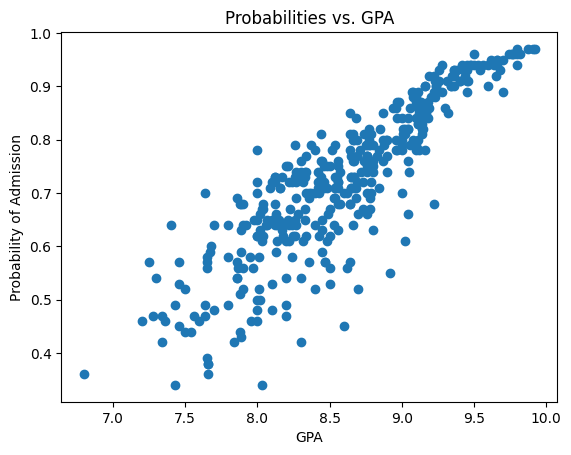

Decision Boundary: 0.19831915918642226
Accuracy of the Logistic Regression Model: 0.025


In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Admission_Predict dataset
data = pd.read_csv("/content/drive/MyDrive/ML_csvs/Admission_Predict.csv")

# a) Display the dataset
print(data.head())

# b) Plot GPA vs. Admission Score
plt.scatter(data['CGPA'], data['GRE Score'])
plt.xlabel('CGPA')
plt.ylabel('Admission Score')
plt.title('CGPA vs. Admission Score')
plt.show()

# c) Fit logistic regression model and find the slope and intercept
X = data['CGPA'].values.reshape(-1, 1)
y = data['GRE Score']
model = LogisticRegression(solver='liblinear')
model.fit(X, y)
slope = model.coef_[0][0]
intercept = model.intercept_[0]
print(f"Slope: {slope}, Intercept: {intercept}")

# d) Compute the log odds for each entry and merge as a new column
log_odds = model.predict_log_proba(X)[:, 1]
data['log_odds'] = log_odds

# e) Compute probability for each entry using the log odds
data['probability'] = np.exp(log_odds) / (1 + np.exp(log_odds))

# f) Plot probabilities vs. GPA graph
plt.scatter(data['CGPA'], data['Chance of Admit '])
plt.xlabel('GPA')
plt.ylabel('Probability of Admission')
plt.title('Probabilities vs. GPA')
plt.show()

# g) Show decision boundary
decision_boundary = -intercept / slope
print(f"Decision Boundary: {decision_boundary}")

# h) Calculate accuracy of the logistic regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression Model: {accuracy}")

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

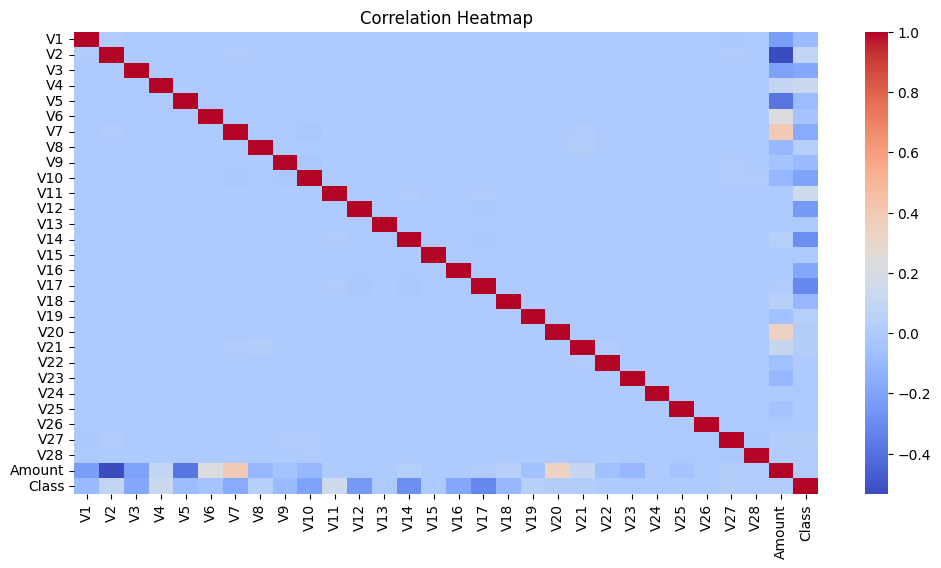

Training Accuracy: 1.00
Testing Accuracy: 1.00
Confusion Matrix:
[[56650     6]
 [   41    49]]
Precision: 0.89
Recall: 0.54


In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# a) Download the dataset manually from Kaggle and place it in your working directory.

# b) Load the dataset, visualize it, show the data headers
data = pd.read_csv("/content/drive/MyDrive/ML_csvs/creditcard.csv")
print(data.head())

# c) Preprocess the dataset
# i. Check for duplicate data and remove duplicates
data = data.drop_duplicates()

# ii. Remove columns that are not important (e.g., 'Time')
data = data.drop(columns=['Time'])

# iii. Separate the dataset into feature and target columns
X = data.drop(columns=['Class'])
y = data['Class']

# iv. Scale the dataset using standard scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# v. Partition the dataset into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# d) Plot histograms/heatmaps to understand the values of each variable
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False, fmt=".1f")
plt.title("Correlation Heatmap")
plt.show()

# e) Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# f) Obtain the training accuracy
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy:.2f}")

# g) Test the model and obtain the testing accuracy
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Testing Accuracy: {test_accuracy:.2f}")

# h) Generate confusion matrix, precision, and recall
confusion = confusion_matrix(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)

print("Confusion Matrix:")
print(confusion)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
